## **Soal 2 - World Happiness 😄**

Disediakan dataset laporan tingkat kebahagiaan di berbagai negara di dunia, unduh di sini: [World Happiness](https://www.kaggle.com/unsdsn/world-happiness#2019.csv). Gunakan hanya dataset _2019.csv_, lalu buatlah sebuah file _notebook_ (__.ipynb__) dan selesaikanlah beberapa soal berikut:

1. Untuk setiap numerik _feature/column_ (kecuali column ```Overall Rank```), hitunglah:
    - Mean, Median dan Modus
    - Range, Q1, Q3 dan IQR
    - Standard Deviasi & Variance
    - Z-score tiap data point

2. Untuk setiap numerik _feature/column_ (kecuali column ```Overall Rank```), carilah _data outlier_-nya berdasarkan:
    - IQR method
    - Z-score method

3. Tampilkan sebaran masing-masing numerik _feature/column_ (kecuali column ```Overall Rank```) dalam bentuk _boxplot_ dan _histogram_!

4. Di antara semua numerik _feature/column_ (kecuali column ```Overall Rank```), _feature/column_ mana saja yang sangat mempengaruhi _happiness score_ suatu negara? Buktikan dengan menghitung nilai:
    - Covariance
    - Pearson Correlation
    - Spearman Correlation
    - Kendall Correlation

5. Visualisasikan dalam bentuk _bar chart_ data berikut:
    - 10 Negara dengan _GDP per capita_ tertinggi.
    - 10 Negara dengan _Healthy life expectancy_ tertinggi.
    - 10 Negara dengan _Perceptions of corruption_ tertinggi.

✅ _Push & commit jawaban Anda ke sebuah repo github dengan nama __Soal2_WorldHappiness__. Kirim & lampirkan url repo github Anda via email ke lintang@purwadhika.com_ dengan subject email "_NamaLengkap_WorldHappiness_".

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('world-happiness/2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### 1. Summary

In [97]:
import statistics
df2 = df.iloc[:, 2:]
summary = pd.DataFrame()
z = pd.DataFrame()

for col in df2:
    summary.loc['mean', col] = df2[col].mean()
    summary.loc['median', col] = df2[col].median()
    summary.loc['mode', col] = statistics.mode(df2[col])
    summary.loc['range', col] = df2[col].max() - df2[col].min()
    summary.loc['Q1', col] = np.percentile(df2[col], 25)
    summary.loc['Q3', col] = np.percentile(df2[col], 75)
    summary.loc['IQR', col] = np.percentile(df2[col], 75) - np.percentile(df2[col], 25)
    summary.loc['std', col] = df2[col].std(ddof = 1)
    summary.loc['var', col] = df2[col].std(ddof = 1) ** 2
    z[col] = (df2[col] - df2[col].mean()) / df2[col].std(ddof = 1)

In [98]:
summary

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
median,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
mode,5.208000,0.960000,1.465000,0.999000,0.557000,0.153000,0.078000
range,4.916000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000
Q1,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
Q3,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
IQR,1.640000,0.629750,0.396750,0.334000,0.199250,0.139500,0.094250
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
var,1.239036,0.158714,0.089515,0.058624,0.020532,0.009073,0.008937


In [203]:
z

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.121877,1.091526,1.264027,1.076954,1.419710,-0.334327,2.987137
1,1.970052,1.199461,1.217234,1.118255,1.391794,0.704994,3.166959
2,1.928727,1.463022,1.247315,1.250419,1.468562,0.904460,2.437092
3,1.874824,1.191931,1.387693,1.242159,1.384816,1.775811,0.078248
4,1.869434,1.232092,1.046774,1.130646,1.147534,1.439868,1.982248
...,...,...,...,...,...,...,...
151,-1.862420,-1.370888,-1.663865,-0.459449,1.133576,0.337557,3.177537
152,-1.954952,-1.077206,-1.082297,-0.934412,0.170490,0.956951,0.385004
153,-1.980107,-1.393479,-2.312279,-1.504368,-2.739702,-0.281836,-0.905485
154,-2.087912,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707


<hr>

### 2. Outliers

In [139]:
df2 = df.iloc[:, 2:]

# IQR method
# high outliers > Q3 + 1.5 * IQR
# low outliers < Q1 - 1.5 * IQR
df2_outIQR = {}
for col in df2:
    IQR = np.percentile(df2[col], 75) - np.percentile(df2[col], 25)
    high_out = np.percentile(df2[col], 75) + (1.5 * IQR)
    low_out = np.percentile(df2[col], 25) - (1.5 * IQR)
    df2_outIQR[col] = list(filter(lambda x: x < low_out or x > high_out, df2[col]))
df2_outIQR = pd.DataFrame({key:pd.Series(value) for key, value in df2_outIQR.items()})

# Z-score
# high outliers > mean + 2s 
# low outliers < mean - 2s
df2_outZ = {}
for col in df2:
    high_out = z[col] > df2[col].mean() + (df2[col].std(ddof = 1) * 2)
    low_out = z[col] < df2[col].mean() - (df2[col].std(ddof = 1) * 2)
    df2_outZ[col] = list(df2[col][high_out]) + list(df2[col][low_out])
df2_outZ = pd.DataFrame({key:pd.Series(value) for key, value in df2_outZ.items()})

<ipython-input-139-8a110f7caf03>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2_outIQR = pd.DataFrame({key:pd.Series(value) for key, value in df2_outIQR.items()})


In [140]:
df2_outIQR

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,NaN,NaN,0.437,0.0,0.0,0.498,0.393
1,NaN,NaN,0.447,NaN,NaN,0.566,0.410
2,NaN,NaN,0.378,NaN,NaN,NaN,0.341
3,NaN,NaN,0.000,NaN,NaN,NaN,0.298
4,NaN,NaN,NaN,NaN,NaN,NaN,0.343
5,NaN,NaN,NaN,NaN,NaN,NaN,0.373
6,NaN,NaN,NaN,NaN,NaN,NaN,0.380
7,NaN,NaN,NaN,NaN,NaN,NaN,0.308
8,NaN,NaN,NaN,NaN,NaN,NaN,0.290
9,NaN,NaN,NaN,NaN,NaN,NaN,0.316


In [204]:
df2_outZ

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.609,1.310,1.028,0.596,0.252,0.393
1,7.600,1.684,1.323,1.026,0.592,0.271,0.410
2,7.554,0.800,1.369,1.052,0.603,0.354,0.341
3,7.494,0.794,1.269,1.026,0.591,0.322,0.298
4,7.488,0.745,1.357,1.039,0.557,0.263,0.343
...,...,...,...,...,...,...,...
151,3.334,NaN,NaN,NaN,NaN,NaN,NaN
152,3.231,NaN,NaN,NaN,NaN,NaN,NaN
153,3.203,NaN,NaN,NaN,NaN,NaN,NaN
154,3.083,NaN,NaN,NaN,NaN,NaN,NaN


<hr>

### 3. Sebaran : Boxplot & Histogram

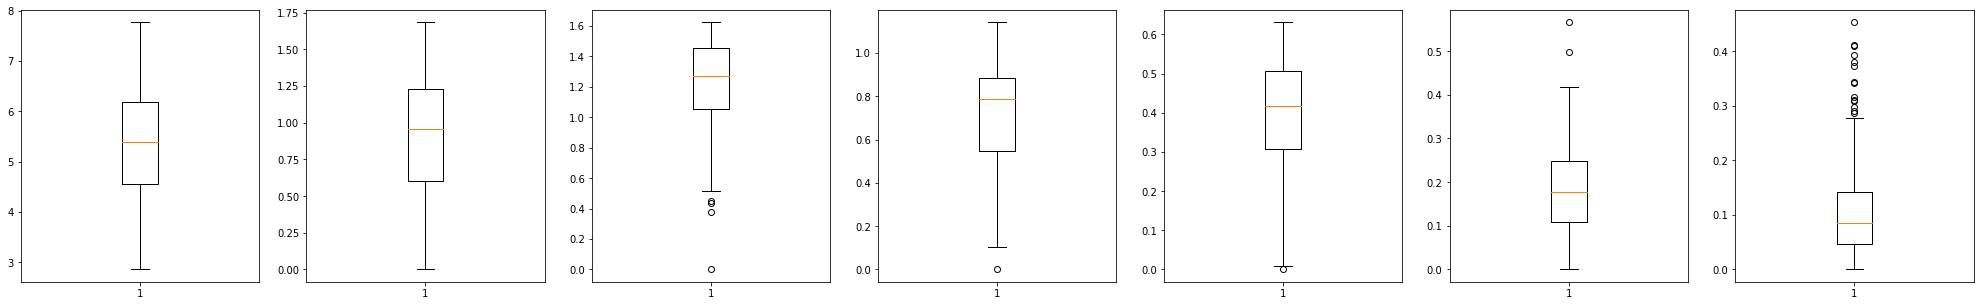

In [205]:
# 3. Sebaran : Boxplot & Histogram
# Boxplot
fig, ax = plt.subplots(1, len(df2.columns), figsize = (35, 5))
for i in range(len(df2.columns)):
    ax[i].boxplot(df2.iloc[:, i])
plt.show()

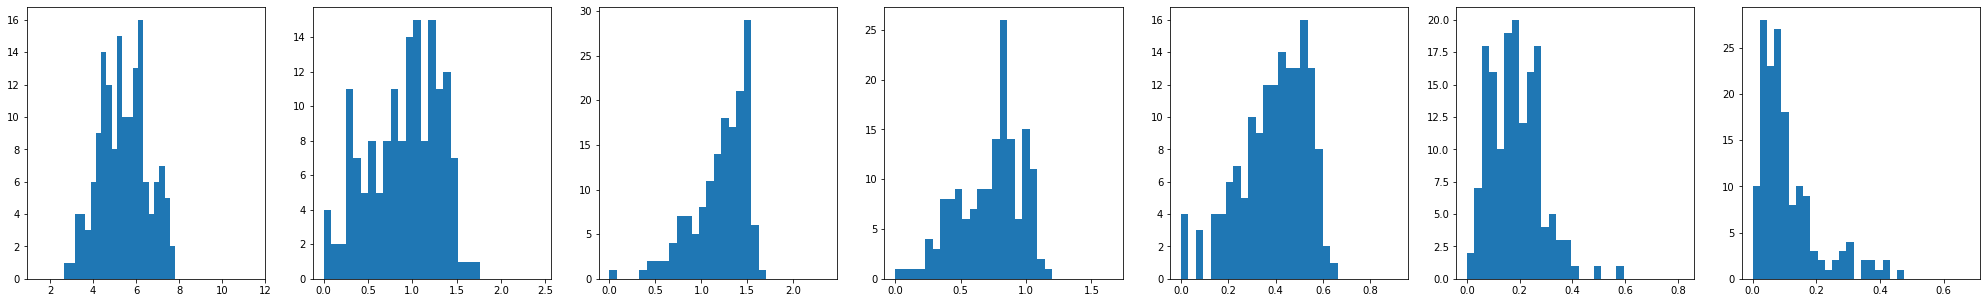

In [206]:
# Histogram
fig, ax = plt.subplots(1, len(df2.columns), figsize = (35, 5))
for i in range(len(df2.columns)):
    rangebins = (df2.iloc[:, i].max() - df2.iloc[:, i].min()) / 20
    min = df2.iloc[:, i].min() - (0.5 * df2.iloc[:, i].min())
    max = df2.iloc[:, i].max() + (0.5 * df2.iloc[:, i].max())
    bins = np.arange(min, max, rangebins)
    ax[i].hist(df2.iloc[:, i], bins)
plt.show()

<hr>

### 4. Happiness score

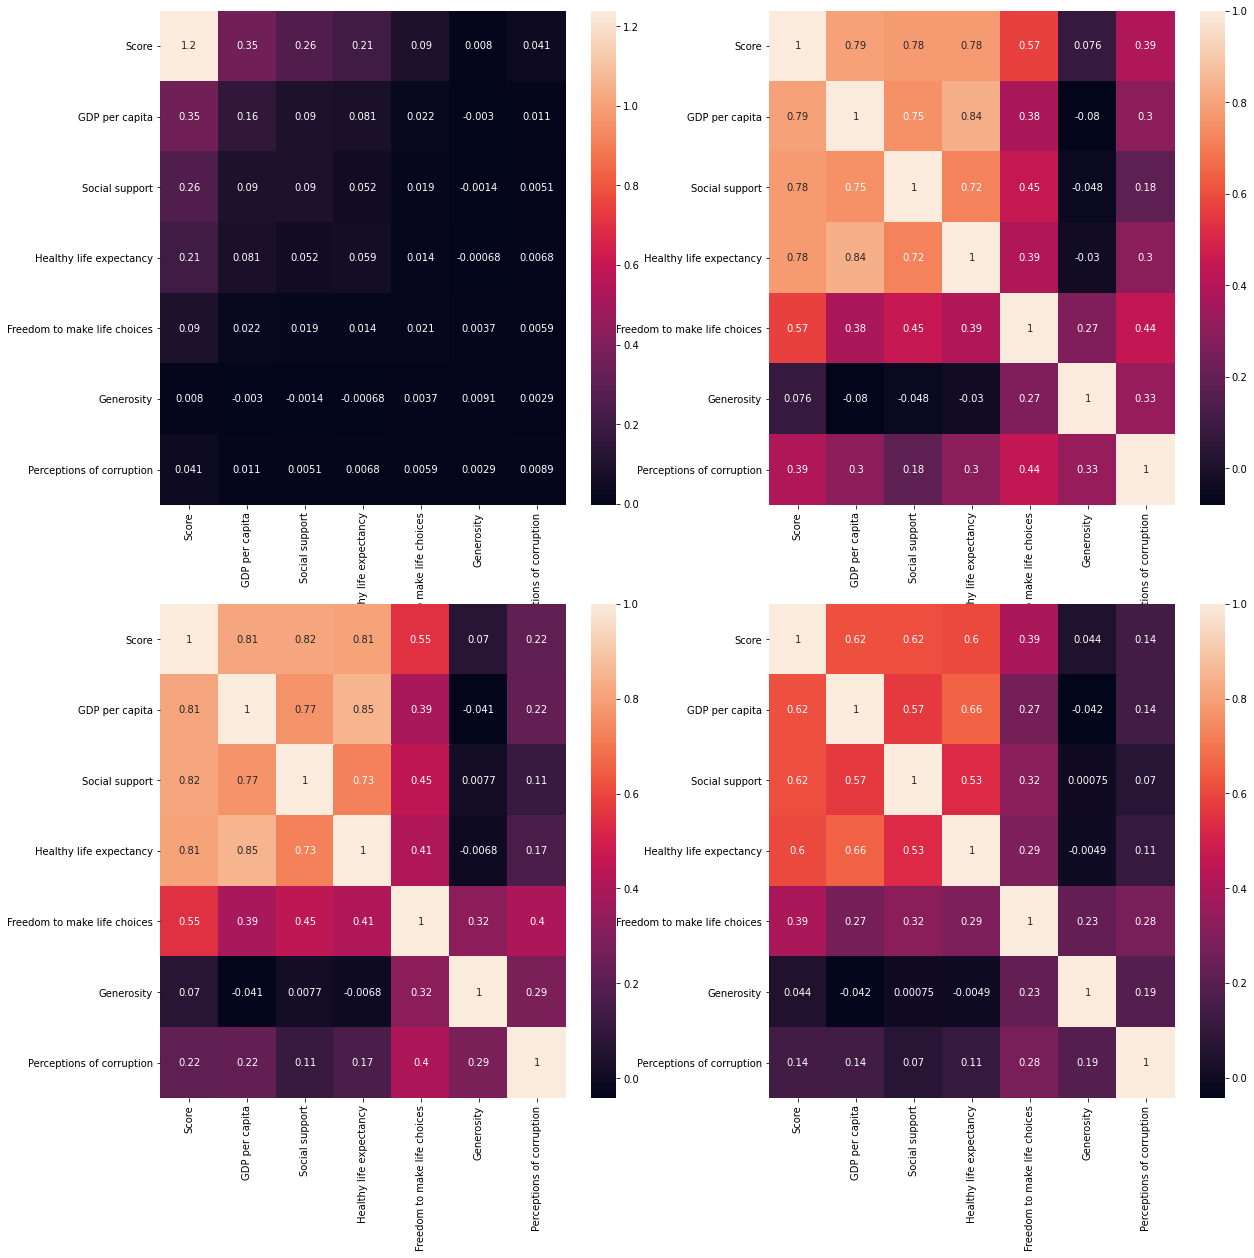

In [228]:
fig, ax = plt.subplots(2, 2, figsize = (20, 20))
sns.heatmap(df2.cov(), annot = True, ax = ax[0, 0])
sns.heatmap(df2.corr(method = 'pearson'), annot = True, ax = ax[0, 1])
sns.heatmap(df2.corr(method = 'spearman'), annot = True, ax = ax[1, 0])
sns.heatmap(df2.corr(method = 'kendall'), annot = True, ax = ax[1, 1])

Dari hasil perhitungan correlation dan covariance dari dataset, _column_ yang paling mempengaruhi _happiness score_ adalah **GDP per capita**, **social support** dan **healthy life expectancy**.

<hr>

### 5. Visualisasikan dalam bentuk _bar chart_ data berikut:

10 Negara dengan _GDP per capita_ tertinggi.

10 Negara dengan _Healthy life expectancy_ tertinggi.

10 Negara dengan _Perceptions of corruption_ tertinggi.

<BarContainer object of 10 artists>

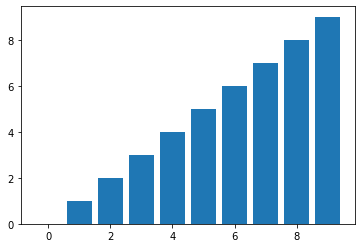

In [230]:
plt.bar(np.arange(10), np.arange(10))

In [245]:
f = df.sort_values(by = 'Score', ascending = False).head(10)

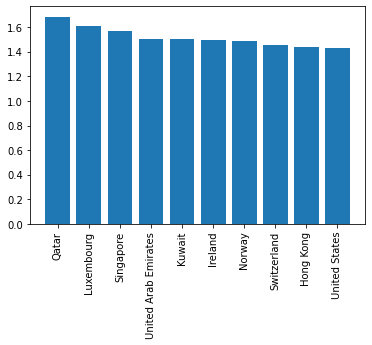

In [260]:
df3 = df[['Country or region', 'GDP per capita']]
df3 = df3.sort_values(by = 'GDP per capita', ascending = False).head(10)
plt.bar(df3['Country or region'], df3['GDP per capita'])
plt.xticks(rotation = 'vertical')
plt.show()

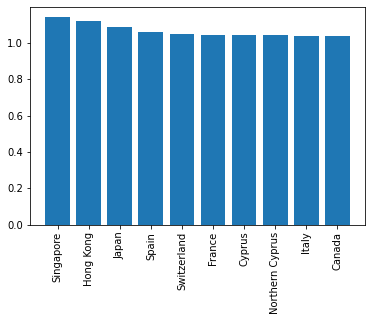

In [261]:
df3 = df[['Country or region', 'Healthy life expectancy']]
df3 = df3.sort_values(by = 'Healthy life expectancy', ascending = False).head(10)
plt.bar(df3['Country or region'], df3['Healthy life expectancy'])
plt.xticks(rotation = 'vertical')
plt.show()

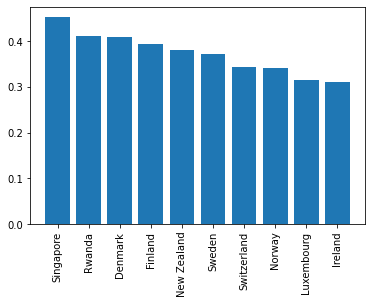

In [262]:
df3 = df[['Country or region', 'Perceptions of corruption']]
df3 = df3.sort_values(by = 'Perceptions of corruption', ascending = False).head(10)
plt.bar(df3['Country or region'], df3['Perceptions of corruption'])
plt.xticks(rotation = 'vertical')
plt.show()